## Import Libraries 

In [1]:
import pandas as pd
import streamlit as st
import plotly.express as px

## Reading Data Set

In [2]:
animes_df = pd.read_csv('anime.csv')

In [94]:
pd.set_option('display.max_columns', None)

## EDA

In [3]:
animes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [4]:
animes_df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [97]:
animes_df.duplicated().sum()

0

In [98]:
# Converting the Score, Score-10 and Score-1 columns to float
animes_df['Score'] = pd.to_numeric(animes_df['Score'], errors='coerce')
animes_df['Score-10'] = pd.to_numeric(animes_df['Score-10'], errors='coerce')
animes_df['Score-1'] = pd.to_numeric(animes_df['Score-1'], errors='coerce')

In [99]:
# Converting the Score-10 and Score-1 columns to int
animes_df['Score-10'] = animes_df['Score-10'].fillna(0).astype(int)
animes_df['Score-1'] = animes_df['Score-1'].fillna(0).astype(int)

In [100]:
# Defining a function to classify animes according to their score
def find_rating(score):
    if score == 'Unknown':
        return 'Unknown'
        
    try:
        score = float(score)
        if score >= 9:
            return 'Excellent'
        elif score >= 6:
            return 'Good'
        elif score >= 3:
            return 'Bad'
        else:
            return 'Terrible'
    except ValueError:
        return 'Unknown'

In [101]:
# Using the function to create a column with the anime appreciation level
animes_df['Appreciation'] = animes_df['Score'].apply(find_rating)

In [102]:
animes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MAL_ID         17562 non-null  int64  
 1   Name           17562 non-null  object 
 2   Score          12421 non-null  float64
 3   Genres         17562 non-null  object 
 4   English name   17562 non-null  object 
 5   Japanese name  17562 non-null  object 
 6   Type           17562 non-null  object 
 7   Episodes       17562 non-null  object 
 8   Aired          17562 non-null  object 
 9   Premiered      17562 non-null  object 
 10  Producers      17562 non-null  object 
 11  Licensors      17562 non-null  object 
 12  Studios        17562 non-null  object 
 13  Source         17562 non-null  object 
 14  Duration       17562 non-null  object 
 15  Rating         17562 non-null  object 
 16  Ranked         17562 non-null  object 
 17  Popularity     17562 non-null  int64  
 18  Member

In [103]:
animes_df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Appreciation
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580,Good
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379,Good
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533,Good
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131,Good
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27,Good


In [104]:
# I love evangelion
eva = animes_df[animes_df['Name'].str.contains('Evangelion:|Neon Genesis')]
eva

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Appreciation
20,30,Neon Genesis Evangelion,8.32,"Action, Sci-Fi, Dementia, Psychological, Drama...",Neon Genesis Evangelion,新世紀エヴァンゲリオン,TV,26,"Oct 4, 1995 to Mar 27, 1996",Fall 1995,"TV Tokyo, Kadokawa Shoten, Nihon Ad Systems, A...","ADV Films, Netflix","Gainax, Tatsunoko Production",Original,24 min. per ep.,PG-13 - Teens 13 or older,208.0,54,1160651,71308,66549,815938,35566,20358,222240,186797,168056.0,157596.0,93532.0,38385.0,17571.0,9686.0,4408.0,3263.0,3714,Good
21,31,Neon Genesis Evangelion: Death & Rebirth,7.45,"Drama, Mecha, Psychological, Sci-Fi",Neon Genesis Evangelion:Death & Rebirth,新世紀エヴァンゲリオン劇場版 シト新生,Movie,1,"Mar 15, 1997",Unknown,"Movic, Sega, TV Tokyo Music, Audio Tanaka",Manga Entertainment,"Gainax, Production I.G",Original,1 hr. 44 min.,R - 17+ (violence & profanity),1742.0,833,180681,588,1941,146202,1069,961,30508,13516,15245.0,23683.0,25396.0,12694.0,6313.0,2636.0,1042.0,654.0,737,Good
22,32,Neon Genesis Evangelion: The End of Evangelion,8.51,"Sci-Fi, Dementia, Psychological, Drama, Mecha",Neon Genesis Evangelion:The End of Evangelion,新世紀エヴァンゲリオン劇場版 THE END OF EVANGELION,Movie,1,"Jul 19, 1997",Unknown,"TV Tokyo, Toei Animation, Kadokawa Shoten, Mov...",Manga Entertainment,"Gainax, Production I.G",Original,1 hr. 27 min.,R+ - Mild Nudity,102.0,195,572080,17811,8055,482918,2462,1499,77146,127081,95821.0,77593.0,41261.0,16444.0,7057.0,4493.0,2279.0,1941.0,2264,Good
2541,2759,Evangelion: 1.0 You Are (Not) Alone,8.07,"Action, Sci-Fi, Psychological, Drama, Mecha",Evangelion:1.0 You Are (Not) Alone,ヱヴァンゲリヲン新劇場版:序,Movie,1,"Sep 1, 2007",Unknown,"Gainax, Starchild Records, KlockWorx",Funimation,Khara,Original,1 hr. 40 min.,PG-13 - Teens 13 or older,449.0,363,367364,1479,4902,293392,2207,1037,65826,31374,52095.0,72936.0,42268.0,12920.0,4679.0,1541.0,563.0,360.0,535,Good
3278,3784,Evangelion: 2.0 You Can (Not) Advance,8.35,"Action, Sci-Fi, Psychological, Drama, Mecha",Evangelion:2.0 You Can (Not) Advance,ヱヴァンゲリヲン新劇場版:破,Movie,1,"Jul 27, 2009",Unknown,"Gainax, KlockWorx",Funimation,Khara,Original,1 hr. 52 min.,PG-13 - Teens 13 or older,184.0,379,350947,2803,4683,277153,2047,872,66192,43399,60134.0,57609.0,28335.0,9590.0,3718.0,1726.0,719.0,405.0,740,Good
3279,3785,Evangelion: 3.0 You Can (Not) Redo,7.59,"Action, Sci-Fi, Psychological, Drama, Mecha",Evangelion:3.0 You Can (Not) Redo,ヱヴァンゲリヲン新劇場版:Q,Movie,1,"Nov 17, 2012",Unknown,"Gainax, KlockWorx",Funimation,Khara,Original,1 hr. 36 min.,PG-13 - Teens 13 or older,1314.0,531,269675,1369,3320,201080,1634,657,62984,19467,26679.0,40265.0,33154.0,15146.0,6698.0,4506.0,2016.0,960.0,876,Good
3280,3786,Evangelion: 3.0+1.0 Thrice Upon a Time,NaN,"Action, Sci-Fi, Psychological, Drama, Mecha",Evangelion:3.0+1.0 Thrice Upon a Time,シン・エヴァンゲリオン劇場版:||,Movie,1,Unknown,Unknown,KlockWorx,Unknown,Khara,Original,Unknown,R - 17+ (violence & profanity),Unknown,917,162841,618,3,1,1,0,162836,2,1.0,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,Terrible
14684,38055,Evangelion: Another Impact (VR),6.42,"Action, Mecha, Sci-Fi",evangelion:Another Impact,evangelion:Another Impact（VR）,Movie,1,"Jul 2, 2018",Unknown,Unknown,Unknown,Unknown,Original,4 min.,PG-13 - Teens 13 or older,6328.0,4780,10704,22,475,3256,187,207,6579,192,130.0,225.0,433.0,499.0,314.0,99.0,57.0,21.0,45,Good


In [105]:
# Taking a look at the best scores
best_animes = animes_df.sort_values(by='Score', ascending=False)
best_animes.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Appreciation
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,24 min. per ep.,R - 17+ (violence & profanity),1.0,3,2248456,183914,171871,1644938,75728,32456,323463,714811,401507.0,199160.0,70045.0,20210.0,9308.0,3222.0,1536.0,2162.0,16806,Excellent
15926,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan Final Season,進撃の巨人 The Final Season,TV,16,"Dec 7, 2020 to ?",Winter 2021,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,MAPPA,Manga,23 min. per ep.,R - 17+ (violence & profanity),2.0,119,733260,44862,566239,553,6658,2090,157720,173154,63756.0,26016.0,8793.0,2674.0,1336.0,588.0,382.0,514.0,11061,Excellent
5683,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",Steins;Gate,STEINS;GATE,TV,24,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"Frontier Works, Media Factory, Movic, AT-X, Ka...",Funimation,White Fox,Visual novel,24 min. per ep.,PG-13 - Teens 13 or older,3.0,9,1771162,148452,114349,1134756,60926,35600,425531,468504,275960.0,140914.0,57740.0,21375.0,11126.0,5061.0,2292.0,1678.0,5255,Excellent
14963,38524,Shingeki no Kyojin Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho...",Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,TV,10,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,23 min. per ep.,R - 17+ (violence & profanity),4.0,63,1073626,40985,54607,906824,5533,3099,103563,327290,239451.0,110481.0,33662.0,8365.0,2974.0,1108.0,550.0,385.0,4169,Excellent
9913,28977,Gintama°,9.10,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama Season 4,銀魂°,TV,51,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,24 min. per ep.,PG-13 - Teens 13 or older,5.0,329,404121,11868,48011,167130,16612,11472,160896,78918,37902.0,21360.0,10215.0,3898.0,2311.0,952.0,648.0,1100.0,4508,Excellent


In [106]:
# Copying the df so we don't modify the original.
animes_df_copy = animes_df.copy()
# Dividing genres into separate lists.
animes_df_copy['Genres'] = animes_df_copy['Genres'].str.split(', ')
# Extracting all unique genres present in the data.
unique_genres = sorted(set(animes_df_copy['Genres'].explode()))

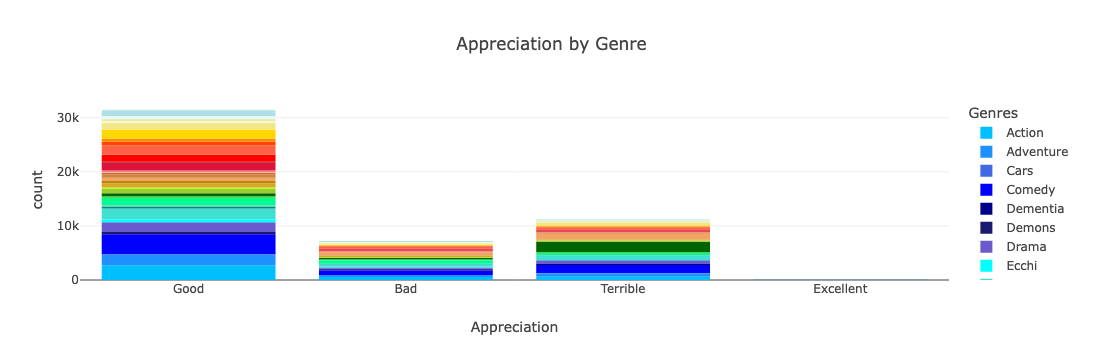

In [107]:
fig1 = px.histogram(animes_df_copy.explode('Genres'), x='Appreciation', color='Genres', category_orders={'Genres': unique_genres}, title='Appreciation by Genre', 
                    color_discrete_map={'Action': 'DeepSkyBlue', 'Adventure': 'DodgerBlue', 'Cars': 'RoyalBlue', 'Comedy': 'Blue', 
                                        'Dementia': 'DarkBlue', 'Demons': 'MidnightBlue', 'Drama': 'SlateBlue', 'Ecchi': 'Cyan', 
                                       'Fantasy': 'Turquoise', 'Game': 'DarkCyan', 'Harem': 'MediumAquamarine', 'Hentai': 'MediumSpringGreen', 
                                       'Historical': 'SpringGreen', 'Horror': 'LimeGreen', 'Josei': 'Green', 'Kids': 'DarkGreen', 
                                       'Magic': 'YellowGreen', 'Martial Arts': 'GreenYellow', 'Mecha': 'Goldenrod', 'Military': 'DarkGoldenrod', 
                                       'Music': 'SandyBrown', 'Mystery': 'Peru', 'Parody': 'Chocolate', 'Police': 'LightPink', 
                                       'Psychological': 'LightCoral', 'Romance': 'Crimson', 'Samurai': 'DarkRed', 'School': 'Red', 
                                       'Sci-Fi': 'Tomato', 'Seinen': 'OrangeRed', 'Shoujo': 'DarkOrange', 'Shoujo Ai': 'Orange', 
                                       'Shounen': 'Gold', 'Shounen Ai': 'Yellow', 'Slice of Life': 'Khaki', 'Space': 'LightGoldenrodYellow', 
                                       'Sports': 'PaleGoldenrod', 'Super Power': 'LightCyan', 'Supernatural': 'PowderBlue',
                                        'Thriller': 'PaleTurquoise', 'Unknown': 'MintCream', 'Vampire': 'Seashell', 'Yaoi': 'OldLace', 
                                       'Yuri': 'Beige'})

fig1.show()

We can see that there are very few excellent animes. How about taking a look at them?

In [108]:
# Defining the columns
ex_cols = ['Name', 'Score', 'Genres', 'Type', 'Episodes', 'Appreciation']
# Extracting only the excellent animes
excellents = animes_df[animes_df['Appreciation'] == 'Excellent'][ex_cols]
# Sorting based on score
excellents = excellents.sort_values(by='Score', ascending=False)
excellents

,Name,Score,Genres,Type,Episodes,Appreciation
3971,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",TV,64,Excellent
15926,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",TV,16,Excellent
5683,Steins;Gate,9.11,"Thriller, Sci-Fi",TV,24,Excellent
6474,Hunter x Hunter (2011),9.10,"Action, Adventure, Fantasy, Shounen, Super Power",TV,148,Excellent
9913,Gintama°,9.10,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,Excellent
14963,Shingeki no Kyojin Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho...",TV,10,Excellent
6006,Gintama',9.08,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",TV,51,Excellent
741,Ginga Eiyuu Densetsu,9.07,"Military, Sci-Fi, Space, Drama",OVA,110,Excellent
7261,Gintama': Enchousen,9.04,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,Excellent
9886,Koe no Katachi,9.00,"Drama, School, Shounen",Movie,1,Excellent


These are all the animes with a rating higher than 9. There are really few of them, I think they all must be amazing.

### Most completed animes

In [109]:
comp_cols = ['Name', 'Score', 'Genres', 'Type', 'Episodes', 'Completed', 'Appreciation']
most_completed = animes_df.sort_values(by='Completed', ascending=False)[comp_cols]
most_completed = most_completed.head(10)
most_completed

,Name,Score,Genres,Type,Episodes,Completed,Appreciation
7449,Shingeki no Kyojin,8.48,"Action, Military, Mystery, Super Power, Drama,...",TV,25,2182587,Good
1393,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",TV,37,2146116,Good
6614,Sword Art Online,7.25,"Action, Game, Adventure, Romance, Fantasy",TV,25,1907261,Good
10451,One Punch Man,8.57,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",TV,12,1841220,Good
11185,Boku no Hero Academia,8.11,"Action, Comedy, School, Shounen, Super Power",TV,13,1655900,Good
3971,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",TV,64,1644938,Excellent
8646,Tokyo Ghoul,7.81,"Action, Mystery, Horror, Psychological, Supern...",TV,12,1594880,Good
10,Naruto,7.91,"Action, Adventure, Comedy, Super Power, Martia...",TV,220,1462223,Good
11308,Kimi no Na wa.,8.96,"Romance, Supernatural, School, Drama",Movie,1,1462143,Good
8148,No Game No Life,8.20,"Game, Adventure, Comedy, Supernatural, Ecchi, ...",TV,12,1426896,Good


These are the 10 most watched animes. A lot of people saw Shingeki no Kyojin huh. I bet they are all worth watching.

### Most dropped animes

In [110]:
drop_cols = ['Name', 'Score', 'Genres', 'Type', 'Episodes', 'Dropped', 'Appreciation']
most_dropped = animes_df.sort_values(by='Dropped', ascending=False)[drop_cols]
most_dropped = most_dropped.head(10)
most_dropped

,Name,Score,Genres,Type,Episodes,Dropped,Appreciation
245,Bleach,7.80,"Action, Adventure, Comedy, Super Power, Supern...",TV,366,174710,Good
4707,Fairy Tail,7.68,"Action, Adventure, Comedy, Magic, Fantasy, Sho...",TV,175,148408,Good
11,One Piece,8.52,"Action, Adventure, Comedy, Super Power, Drama,...",TV,Unknown,136245,Good
1574,Naruto: Shippuuden,8.16,"Action, Adventure, Comedy, Super Power, Martia...",TV,500,124253,Good
12492,Boruto: Naruto Next Generations,5.81,"Action, Adventure, Super Power, Martial Arts, ...",TV,Unknown,113677,Bad
10,Naruto,7.91,"Action, Adventure, Comedy, Super Power, Martia...",TV,220,99806,Good
6614,Sword Art Online,7.25,"Action, Game, Adventure, Romance, Fantasy",TV,25,90661,Good
12493,Black Clover,7.38,"Action, Comedy, Magic, Fantasy, Shounen",TV,170,89594,Good
1393,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",TV,37,80834,Good
7939,Kill la Kill,8.11,"Action, Comedy, Super Power, Ecchi, School",TV,24,67845,Good


These are the 10 most dropped animes, there are a lot of anime with good appreciation here. I wonder why did so many people drop it.

### Most favorite animes

In [111]:
fav_cols = ['Name', 'Score', 'Genres', 'Type', 'Episodes', 'Favorites', 'Appreciation']
most_favorite = animes_df.sort_values(by='Favorites', ascending=False)[fav_cols]
most_favorite = most_favorite.head(10)
most_favorite

,Name,Score,Genres,Type,Episodes,Favorites,Appreciation
3971,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",TV,64,183914,Excellent
5683,Steins;Gate,9.11,"Thriller, Sci-Fi",TV,24,148452,Excellent
6474,Hunter x Hunter (2011),9.10,"Action, Adventure, Fantasy, Shounen, Super Power",TV,148,147274,Excellent
1393,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",TV,37,145201,Good
7449,Shingeki no Kyojin,8.48,"Action, Military, Mystery, Super Power, Drama,...",TV,25,129844,Good
11,One Piece,8.52,"Action, Adventure, Comedy, Super Power, Drama,...",TV,Unknown,126645,Good
1431,Code Geass: Hangyaku no Lelouch,8.72,"Action, Military, Sci-Fi, Super Power, Drama, ...",TV,25,90487,Good
1574,Naruto: Shippuuden,8.16,"Action, Adventure, Comedy, Super Power, Martia...",TV,500,84651,Good
20,Neon Genesis Evangelion,8.32,"Action, Sci-Fi, Dementia, Psychological, Drama...",TV,26,71308,Good
11308,Kimi no Na wa.,8.96,"Romance, Supernatural, School, Drama",Movie,1,71054,Good


Would these be the 10 animes most loved by fans? It's worth giving such beloved animes a chance.

### Animes with the most 10 ratings

In [112]:
s10_cols = ['Name', 'Score', 'Genres', 'Type', 'Episodes', 'Score-10', 'Appreciation']
most_score_10 = animes_df.sort_values(by='Score-10', ascending=False)[s10_cols]
most_score_10 = most_score_10.head(10)
most_score_10

,Name,Score,Genres,Type,Episodes,Score-10,Appreciation
3971,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",TV,64,714811,Excellent
1393,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",TV,37,557406,Good
11308,Kimi no Na wa.,8.96,"Romance, Supernatural, School, Drama",Movie,1,516874,Good
7449,Shingeki no Kyojin,8.48,"Action, Military, Mystery, Super Power, Drama,...",TV,25,470882,Good
5683,Steins;Gate,9.11,"Thriller, Sci-Fi",TV,24,468504,Excellent
6474,Hunter x Hunter (2011),9.10,"Action, Adventure, Fantasy, Shounen, Super Power",TV,148,454000,Excellent
9886,Koe no Katachi,9.00,"Drama, School, Shounen",Movie,1,393684,Excellent
10451,One Punch Man,8.57,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",TV,12,360187,Good
2656,Code Geass: Hangyaku no Lelouch R2,8.91,"Action, Military, Sci-Fi, Super Power, Drama, ...",TV,25,358705,Good
14963,Shingeki no Kyojin Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho...",TV,10,327290,Excellent


These are the animes with the most votes out of 10. I bet these are animes that had a huge impact on all these people.

### Animes with the most 1 ratings

In [113]:
s1_cols = ['Name', 'Score', 'Genres', 'Type', 'Episodes', 'Score-1', 'Appreciation']
most_score_1 = animes_df.sort_values(by='Score-1', ascending=False)[s1_cols]
most_score_1 = most_score_1.head(10)
most_score_1

,Name,Score,Genres,Type,Episodes,Score-1,Appreciation
1490,Boku no Pico,4.37,"Hentai, Yaoi",OVA,1,33750,Bad
2271,School Days,5.68,"Harem, Drama, Romance, School",TV,12,25046,Bad
8058,Pupa,3.41,"Fantasy, Horror, Psychological",TV,12,23622,Bad
6614,Sword Art Online,7.25,"Action, Game, Adventure, Romance, Fantasy",TV,25,23472,Good
387,Hametsu no Mars,2.23,"Sci-Fi, Horror",OVA,1,22048,Terrible
3971,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",TV,64,16806,Excellent
8551,Sword Art Online II,6.79,"Action, Game, Adventure, Romance, Fantasy",TV,24,16529,Good
15172,Ex-Arm,2.18,"Action, Sci-Fi, Ecchi, Seinen",TV,12,15346,Terrible
12492,Boruto: Naruto Next Generations,5.81,"Action, Adventure, Super Power, Martial Arts, ...",TV,Unknown,13039,Bad
2934,Tenkuu Danzai Skelter+Heaven,1.85,"Sci-Fi, Mecha",OVA,1,11816,Terrible


These are the animes with the most votes out of 1. I bet these are animes that had a huge impact on all these people, but... in the bad way.

### Some graphs with interesting data

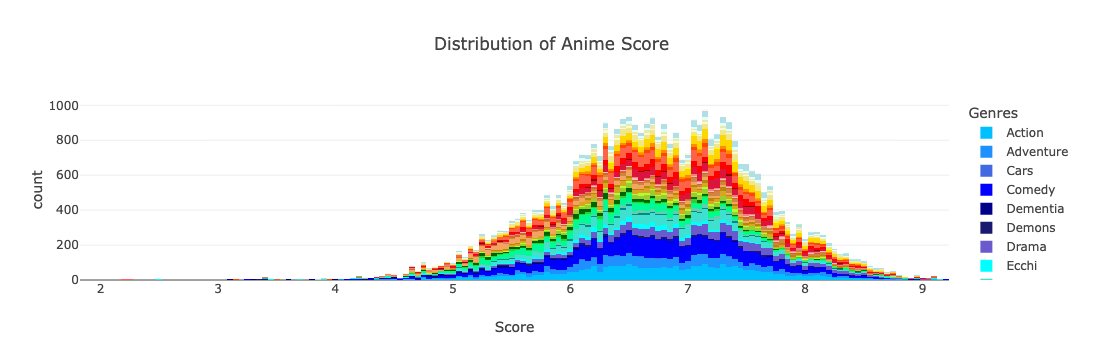

In [114]:
fig2 = px.histogram(animes_df_copy.explode('Genres'), x='Score', color='Genres', category_orders={'Genres': unique_genres}, title='Distribution of Anime Score', 
                   color_discrete_map={'Action': 'DeepSkyBlue', 'Adventure': 'DodgerBlue', 'Cars': 'RoyalBlue', 'Comedy': 'Blue', 
                                        'Dementia': 'DarkBlue', 'Demons': 'MidnightBlue', 'Drama': 'SlateBlue', 'Ecchi': 'Cyan', 
                                       'Fantasy': 'Turquoise', 'Game': 'DarkCyan', 'Harem': 'MediumAquamarine', 'Hentai': 'MediumSpringGreen', 
                                       'Historical': 'SpringGreen', 'Horror': 'LimeGreen', 'Josei': 'Green', 'Kids': 'DarkGreen', 
                                       'Magic': 'YellowGreen', 'Martial Arts': 'GreenYellow', 'Mecha': 'Goldenrod', 'Military': 'DarkGoldenrod', 
                                       'Music': 'SandyBrown', 'Mystery': 'Peru', 'Parody': 'Chocolate', 'Police': 'LightPink', 
                                       'Psychological': 'LightCoral', 'Romance': 'Crimson', 'Samurai': 'DarkRed', 'School': 'Red', 
                                       'Sci-Fi': 'Tomato', 'Seinen': 'OrangeRed', 'Shoujo': 'DarkOrange', 'Shoujo Ai': 'Orange', 
                                       'Shounen': 'Gold', 'Shounen Ai': 'Yellow', 'Slice of Life': 'Khaki', 'Space': 'LightGoldenrodYellow', 
                                       'Sports': 'PaleGoldenrod', 'Super Power': 'LightCyan', 'Supernatural': 'PowderBlue',
                                        'Thriller': 'PaleTurquoise', 'Unknown': 'MintCream', 'Vampire': 'Seashell', 'Yaoi': 'OldLace', 
                                       'Yuri': 'Beige'})
fig2.show()

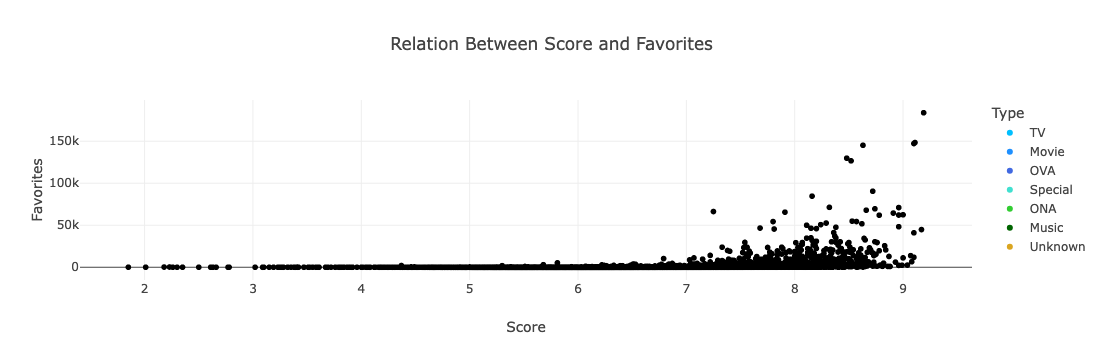

In [115]:
fig5 = px.scatter(animes_df, x='Score', y='Favorites', title='Relation Between Score and Favorites', color='Type', 
                 color_discrete_map={'TV': 'DeepSkyBlue', 'Movie': 'DodgerBlue', 'OVA': 'RoyalBlue', 'Special': 'Turquoise', 
                                     'ONA': 'LimeGreen', 'Music': 'DarkGreen', 'Unknown': 'Goldenrod'})

fig5.show()

In [116]:
# Copying the df so we don't modify the original.
df_copy = animes_df.copy()
# Dividing genres into separate lists.
df_copy['Genres'] = df_copy['Genres'].str.split(', ')
# Dividing the genre lists into separate lines.
df_copy = df_copy.explode('Genres')
# Calculating the average score for each gender
genre_mean_score = df_copy.groupby('Genres')['Score'].mean().reset_index()

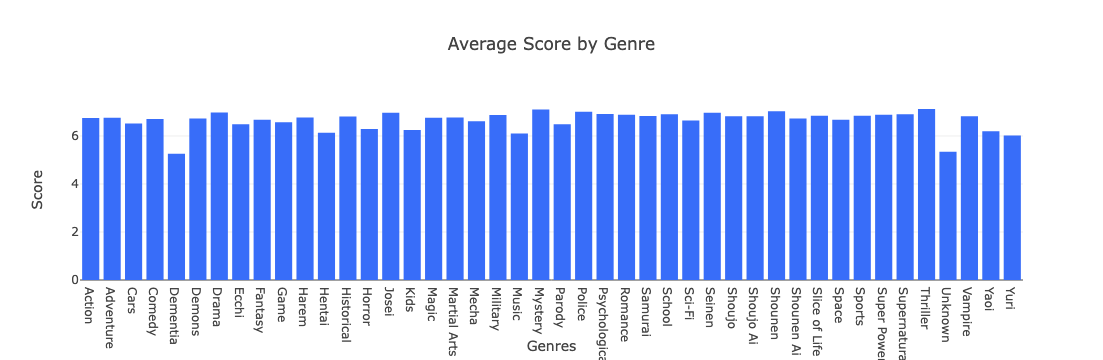

In [117]:
fig4 = px.bar(genre_mean_score, x='Genres', y='Score', title='Average Score by Genre', 
              color_discrete_sequence=['#386df9'] * len(genre_mean_score))

fig4.show()

In [118]:
# Counting the number of each type of anime
type_counts = animes_df['Type'].value_counts().reset_index()
# Renaming the columns
type_counts.columns = ['Type', 'Count']

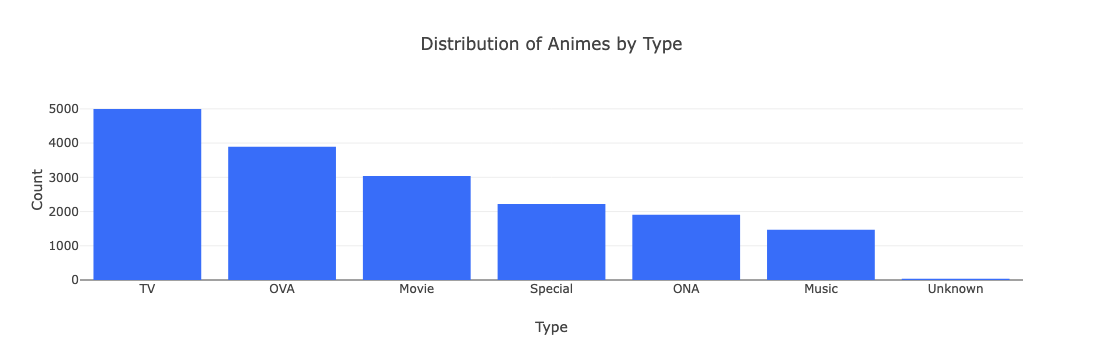

In [119]:
fig3 = px.bar(type_counts, x='Type', y='Count', title='Distribution of Animes by Type', 
             color_discrete_sequence=['#386df9'])

fig3.show()